In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance

import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

import numpy as np


In [59]:
alias_nombres = {
    "Sinner J.": "Jannik Sinner",
    "Zverev A.": "Alexander Zverev",
    "Alcaraz C.": "Carlos Alcaraz",
    "Fritz T.": "Taylor Fritz",
    "Draper J.": "Jack Draper",
    "Djokovic N.": "Novak Djokovic",
    "Ruud C.": "Casper Ruud",
    "De Minaur A.": "Alex De Minaur",
    "Musetti L.": "Lorenzo Musetti",
    "Rune H.": "Holger Rune",
    "Medvedev D.": "Daniil Medvedev",
    "Paul T.": "Tommy Paul",
    "Shelton B.": "Ben Shelton",
    "Fils A.": "Arthur Fils",
    "Dimitrov G.": "Grigor Dimitrov",
    "Tiafoe F.": "Frances Tiafoe",
    "Rublev A.": "Andrey Rublev",
    "Cerundolo F.": "Francisco Cerundolo",
    "Tsitsipas S.": "Stefanos Tsitsipas",
    "Machac T.": "Tomas Machac",
    "Mensik J.": "Jakub Mensik",
    "Humbert U.": "Ugo Humbert",
    "Korda S.": "Sebastian Korda",
    "Khachanov K.": "Karen Khachanov",
    "Popyrin A.": "Alexei Popyrin",
    "Davidovich Fokina A.": "Alejandro Davidovich Fokina",
    "Auger-Aliassime F.": "Felix Auger Aliassime",
    "Shapovalov D.": "Denis Shapovalov",
    "Nakashima B.": "Brandon Nakashima",
    "Berrettini M.": "Matteo Berrettini",
    "Hurkacz H.": "Hubert Hurkacz",
    "Michelsen A.": "Alex Michelsen",
    "Baez S.": "Sebastian Baez",
    "Cobolli F.": "Flavio Cobolli",
    "Griekspoor T.": "Tallon Griekspoor",
    "Mpetshi Perricard G.": "Giovanni Mpetshi Perricard",
    "Arnaldi M.": "Matteo Arnaldi",
    "Lehecka J.": "Jiri Lehecka",
    "Muller A.": "Alexandre Muller",
    "Borges N.": "Nuno Borges",
    "Thompson J.": "Jordan Thompson",
    "Tabilo A.": "Alejandro Tabilo",
    "Monfils G.": "Gael Monfils",
    "Sonego L.": "Lorenzo Sonego",
    "Giron M.": "Marcos Giron",
    "Darderi L.": "Luciano Darderi",
    "Kecmanovic M.": "Miomir Kecmanovic",
    "Goffin D.": "David Goffin",
    "Martinez P.": "Pedro Martinez",
    "Bergs Z.": "Zizou Bergs",
    "Etcheverry T.": "Tomas Martin Etcheverry",
    "Halys Q.": "Quentin Halys",
    "Jarry N.": "Nicolas Jarry",
    "Diallo G.": "Gabriel Diallo",
    "Zhang Z.": "Zhizhen Zhang",
    "Bautista Agut R.": "Roberto Bautista Agut",
    "Fearnley J.": "Jacob Fearnley",
    "Bonzi B.": "Benjamin Bonzi",
    "Carballes Baena R.": "Roberto Carballes Baena",
    "Ugo Carabelli C.": "Camilo Ugo Carabelli",
    "Marozsan F.": "Fabian Marozsan",
    "Nishikori K.": "Kei Nishikori",
    "Comesana F.": "Francisco Comesana",
    "Djere L.": "Laslo Djere",
    "Fonseca J.": "Joao Fonseca",
    "Munar J.": "Jaume Munar",
    "Shang J.": "Juncheng Shang",
    "Bellucci M.": "Mattia Bellucci",
    "Dzumhur D.": "Damir Dzumhur",
    "Tien L.": "Learner Tien",
    "Altmaier D.": "Daniel Altmaier",
    "Medjedovic H.": "Hamad Medjedovic",
    "Yunchaokete B.": "Bu Yunchaokete",
    "Nishioka Y.": "Yoshihito Nishioka",
    "Rinderknech A.": "Arthur Rinderknech",
    "Bublik A.": "Alexander Bublik",
    "Safiullin R.": "Roman Safiullin",
    "Gaston H.": "Hugo Gaston",
    "Vukic A.": "Aleksandar Vukic",
    "Kovacevic A.": "Aleksandar Kovacevic",
    "Oconnell C.": "Christopher Oconnell",
    "Hijikata R.": "Rinky Hijikata",
    "Moutet C.": "Corentin Moutet",
    "Coric B.": "Borna Coric",
    "Van De Zandschulp B.": "Botic Van De Zandschulp",
    "Collignon R.": "Raphael Collignon",
    "Struff J.L.": "Jan Lennard Struff",
    "Walton A.": "Adam Walton",
    "Majchrzak K.": "Kamil Majchrzak",
    "Duckworth J.": "James Duckworth",
    "Norrie C.": "Cameron Norrie",
    "Kopriva V.": "Vit Kopriva",
    "De Jong J.": "Jesper De Jong",
    "Opelka R.": "Reilly Opelka",
    "Nardi L.": "Luca Nardi",
    "Mcdonald M.": "Mackenzie Mcdonald",
    "Shevchenko A.": "Alexander Shevchenko",
    "Carreno Busta P.": "Pablo Carreno Busta",
    "Navone M.": "Mariano Navone",
    "Basavareddy N.": "Nishesh Basavareddy"
}

In [ ]:

# === Paso 1: Cargar datasets ===
df_partidos = pd.read_csv("ausopen.csv", delimiter=';')
df_stats = pd.read_csv("Estadisticas_2024_limpio/stats_Hard.csv")

# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()



# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo_entrenamiento.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")



Dataset preparado para entrenamiento de modelo.


In [ ]:


# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo_entrenamiento.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Evaluación en Test ===
Accuracy: 0.64
F1 Score: 0.7429
Confusion Matrix:
 [[ 3  6]
 [ 3 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.68      0.81      0.74        16

    accuracy                           0.64        25
   macro avg       0.59      0.57      0.57        25
weighted avg       0.62      0.64      0.62        25



ESTOS SON LOS RESULTADOS UTILIZANDO RF PARA PREDECIR 1 TORNEO USANDO STATS DE HARD

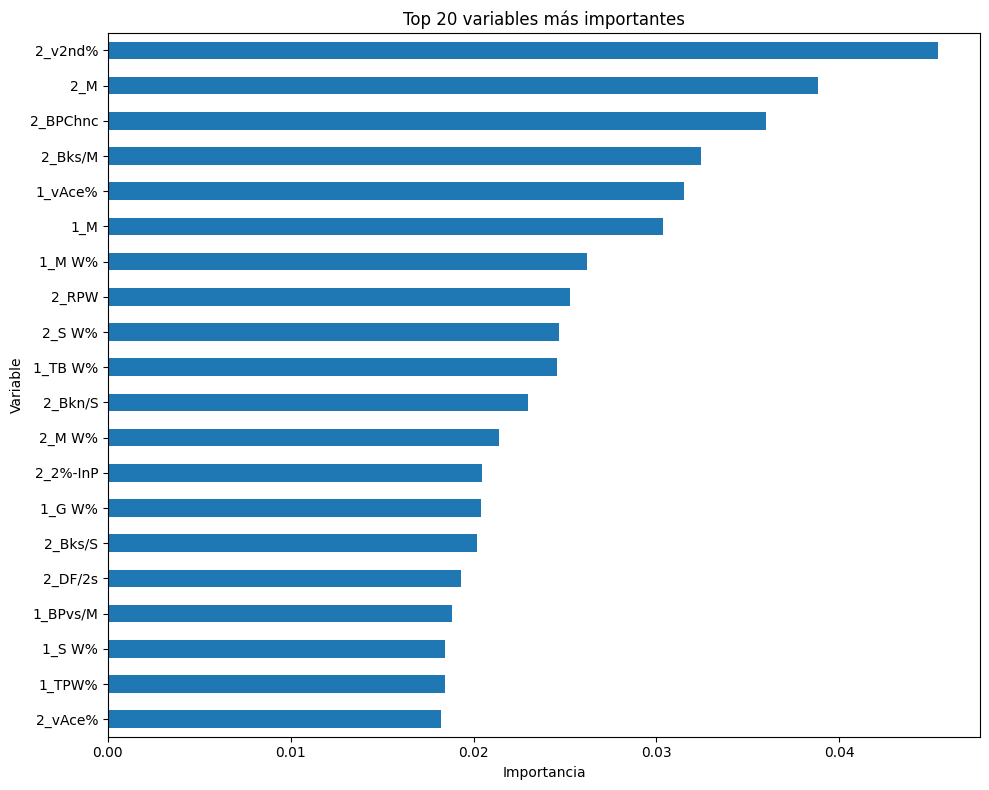

In [ ]:


# Obtener importancias y nombres de las variables
importancias = model.feature_importances_
nombres_vars = X.columns

# Crear DataFrame ordenado por importancia
importancias_df = pd.DataFrame({
    'Variable': nombres_vars,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 20 más importantes
top_n = 20
importancias_df.head(top_n).plot(kind='barh', x='Variable', y='Importancia', figsize=(10, 8), legend=False)
plt.gca().invert_yaxis()  # más importante arriba
plt.title(f'Top {top_n} variables más importantes')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


In [ ]:

# === Paso 1: Cargar datasets ===
df_partidos = pd.read_csv("ausopen.csv", delimiter=';')
df_stats = pd.read_csv("Estadisticas_2024_limpio/estadisticas_generales_2024.csv")

# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo_entrenamiento2.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")



Dataset preparado para entrenamiento de modelo.


In [ ]:


# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo_entrenamiento2.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Evaluación en Test ===
Accuracy: 0.56
F1 Score: 0.6452
Confusion Matrix:
 [[ 4  5]
 [ 6 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.67      0.62      0.65        16

    accuracy                           0.56        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.57      0.56      0.56        25



ESTOS SON LOS RESULTADOS UTILIZANDO RF PARA PREDECIR 1 TORNEO USANDO STATS GENERAL DEL AÑO
OBSERVAMOS QUE EL ACCURACY ES PEOR ---> TIENE SENTIDO

In [ ]:

# === Cargar datos ===
df = pd.read_csv("dataset_modelo_entrenamiento.csv")

# === Separar features y target ===
X = df.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])  # no usamos los nombres
y = df['W_OR_L']


# === Validación cruzada estratificada ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print(f"\nFold {fold+1}")
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))

    scores.append((acc, f1))

# === Resultados promedio ===
mean_acc = sum([s[0] for s in scores]) / len(scores)
mean_f1 = sum([s[1] for s in scores]) / len(scores)

print("\n=== RESULTADOS PROMEDIO ===")
print("Accuracy promedio:", round(mean_acc, 4))
print("F1 promedio:", round(mean_f1, 4))



Fold 1
Accuracy: 0.64
F1 Score: 0.7429
[[ 3  5]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.72      0.76      0.74        17

    accuracy                           0.64        25
   macro avg       0.58      0.57      0.57        25
weighted avg       0.63      0.64      0.63        25


Fold 2
Accuracy: 0.8
F1 Score: 0.8718
[[ 3  5]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.77      1.00      0.87        17

    accuracy                           0.80        25
   macro avg       0.89      0.69      0.71        25
weighted avg       0.85      0.80      0.77        25


Fold 3
Accuracy: 0.84
F1 Score: 0.8889
[[ 5  3]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.84      0.94      0.89        17

    ac

ESTOS SON LOS RESULTADOS UTILIZANDO RF Y FOLD PARA PREDECIR 1 TORNEO USANDO STATS DE HARD
PARA VALIDACION CRUZADA, POR QUE?
MEJORA BASTANTE --->

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Evaluación en Test ===
Accuracy: 0.64
F1 Score: 0.7097
Confusion Matrix:
 [[ 5  4]
 [ 5 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.73      0.69      0.71        16

    accuracy                           0.64        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.65      0.64      0.64        25



<Figure size 1000x800 with 0 Axes>

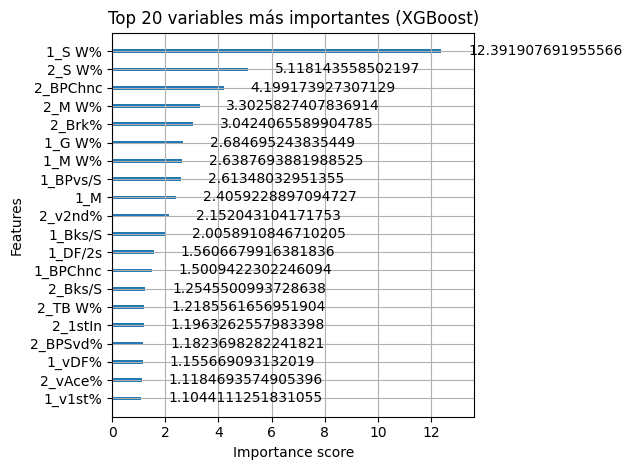

In [ ]:

# === Cargar dataset ===
df = pd.read_csv("dataset_modelo_entrenamiento.csv")

# === Eliminar columnas no predictivas (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar en entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Entrenar modelo XGBoost ===
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# === Evaluación ===
y_pred = model.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Importancia de variables ===
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 variables más importantes (XGBoost)")
plt.tight_layout()
plt.show()


ESTOS SON LOS RESULTADOS UTILIZANDO XGB PARA PREDECIR 1 TORNEO USANDO STATS DE HARD
LA PRECISION EMPEORA --> SE PUEDE DEBER A

In [ ]:
import pandas as pd

# === Paso 1: Cargar datasets ===
df_partidos = pd.read_csv("dataset_3hard.csv", delimiter=';')
df_stats = pd.read_csv("Estadisticas_2024_limpio/stats_Hard.csv")

# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo_entrenamiento3.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")



Dataset preparado para entrenamiento de modelo.


In [69]:

# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo_entrenamiento3.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.7407
F1 Score: 0.8108
Confusion Matrix:
 [[10  9]
 [ 5 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.77      0.86      0.81        35

    accuracy                           0.74        54
   macro avg       0.72      0.69      0.70        54
weighted avg       0.73      0.74      0.73        54



SOBREENTRENO

In [77]:
# Importancia de variables
rf_importances = pd.Series(model1.feature_importances_, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Muestra todas las filas
print("\n=== Importancia de Variables ===")
print(rf_importances)


=== Importancia de Variables ===
2_BPChnc     0.030623
2_vAce%      0.027542
2_Bkn/S      0.023895
2_G W%       0.023381
2_RPW        0.021610
1_G W%       0.020969
1_BPConv%    0.020936
2_S W%       0.020302
1_v1st%      0.020045
1_BPvs/G     0.019741
1_M          0.019688
2_Bks/M      0.019215
1_S W%       0.019199
1_2%-InP     0.019162
1_TB W%      0.018994
1_TPW%       0.018866
1_DF/2s      0.017901
2_M          0.017853
2_v2nd%      0.017743
1_vAce%      0.016991
1_BPvs/M     0.016771
1_2nd%       0.016572
2_DF/2s      0.016567
2_DF%        0.016369
2_2nd%       0.015622
2_BPSvd%     0.015560
1_RPW        0.015475
1_v2nd%      0.014927
2_M W%       0.014822
1_Ace%       0.014707
1_BPSvd%     0.014652
2_Bks/S      0.014537
2_TB W%      0.014088
1_1stIn      0.013858
2_TPW%       0.013780
1_vDF%       0.013755
1_BP/M       0.012994
1_DF%        0.012876
1_Bks/M      0.012666
2_Hld%       0.012552
1_SPW        0.012517
2_BPConv%    0.012483
1_1st%       0.012483
2_SPW        0.01216